In [ ]:
user_data:

client – идентификатор пользователя
premium – является ли клиент премиум
age – возраст

logs:

client – идентификатор пользователя
success – результат (успех - 1, нет - 0)
platform – платформа
time – время в формате Unix


In [ ]:
#1
Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [46]:
import pandas as pd

In [47]:
u_d = pd.read_csv('user_data.csv')
u_d.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [48]:
logs = pd.read_csv('logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [ ]:
##ЕСТЬ ЛИ ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ?


In [43]:
u_d.isna().sum()



client     0
premium    0
age        0
dtype: int64

In [42]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [ ]:
#2
Какой клиент совершил больше всего успешных операций? (success == True)

In [ ]:
.groupby ('client')   query ("success=='True'")

In [98]:
success_client = logs \
.query ('success==True') \
.groupby ('client', as_index = False) \
.agg ({'success':'count'}) \
.sort_values ('success', ascending=False)

In [106]:
s_c = success_client \
    .sort_values ('client') \
    .query('success==41') \
    .client.tolist ()

In [ ]:
##перевод в строку. метод join

In [ ]:
#example
['a','b','c']

In [88]:
'-'.join(['a','b','c'])

'a-b-c'

In [100]:
#можно было не использовать квери True=1, False = 0
success_client_2 = logs \
.groupby ('client', as_index = False) \
.agg ({'success':'sum'}) \
.sort_values ('success', ascending=False)

In [101]:
success_client_2

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [105]:
s_c_2 = success_client_2\
    .sort_values ('client') \
    .query('success==41') \
    .client.tolist ()

In [107]:
s_c_2 == s_c

True

In [ ]:
#2
С какой платформы осуществляется наибольшее количество успешных операций?


In [110]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [151]:
suc_platforms = logs \
                .groupby ('platform',as_index = False) \
                .agg ({'success':'sum'}) \
                .sort_values('success', ascending=False)
suc_platforms

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [153]:
##короче
suc_platforms = logs.query ('success== True').platform.value_counts().idxmax ()
suc_platforms

'phone'

In [ ]:
#3
Какую платформу предпочитают премиумные клиенты?

In [155]:
u_d

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [179]:
platform_premium = logs.merge(premium_clients)

In [177]:
premium_clients = u_d.query ('premium==True')

In [182]:
platform_premium.platform.value_counts ()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [ ]:
#4
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


In [186]:
u_d.head(2)

,client,premium,age
0,46346,False,58
1,4391,False,55


In [203]:
import seaborn as sns




C:\Users\yana2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

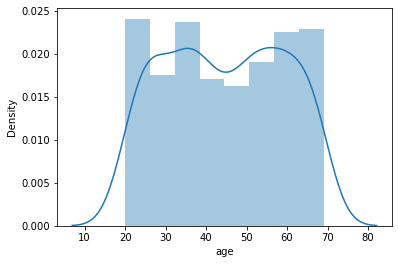

In [204]:
sns.distplot(platform_premium.age)

In [205]:
import matplotlib.pyplot as plt


C:\Users\yana2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

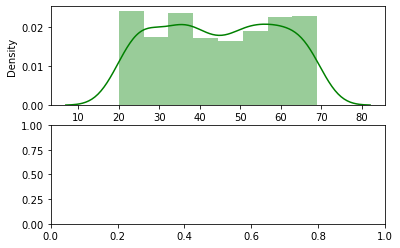

In [208]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.distplot(platform_premium.age, ax=ax[0], color ='green')

In [ ]:
#5
Постройте график распределения числа успешных операций

C:\Users\yana2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='success', ylabel='Density'>

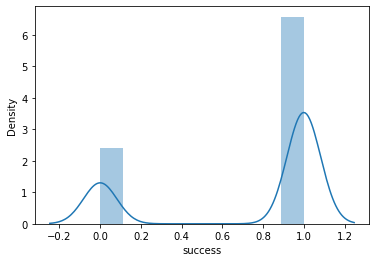

In [212]:
sns.distplot(logs.success)